In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# Loading Dataset
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
#EDA & Data Preprocessing

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [8]:
# Renaming columns
data = data.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
data.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
data.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


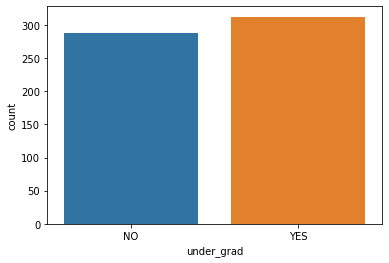

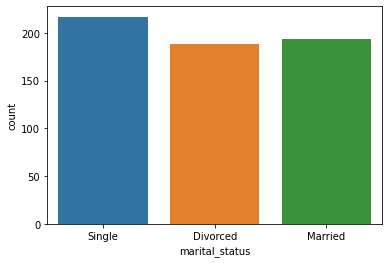

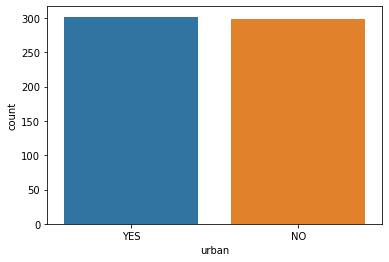

In [10]:

# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(data['under_grad'])
plt.show()

sns.countplot(data['marital_status'])
plt.show()

sns.countplot(data['urban'])
plt.show()

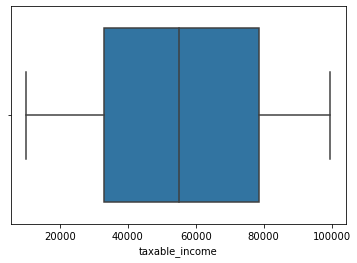

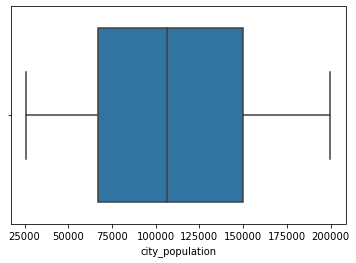

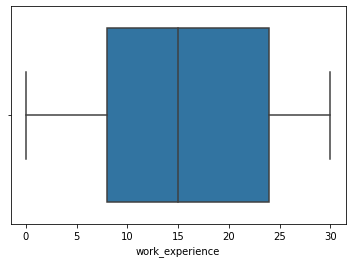

In [11]:
# Checking for outliers in numerical data
sns.boxplot(data['taxable_income'])
plt.show()

sns.boxplot(data['city_population'])
plt.show()

sns.boxplot(data['work_experience'])
plt.show()

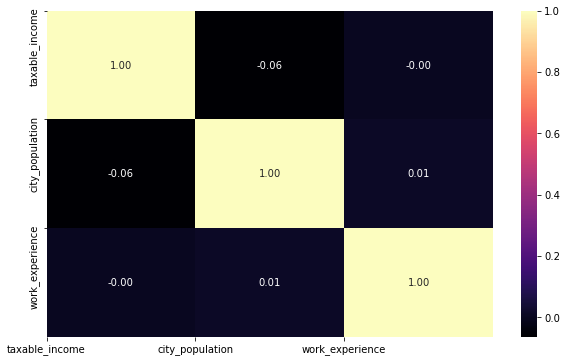

In [12]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [13]:

# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data['taxable_category'] = pd.cut(x = data['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


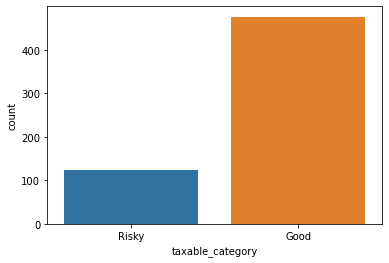

In [14]:
sns.countplot(data['taxable_category'])

In [15]:
data['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [16]:

#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['under_grad'] = label_encoder.fit_transform(data['under_grad'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['urban'] = label_encoder.fit_transform(data['urban'])
data['taxable_category'] = label_encoder.fit_transform(data['taxable_category'])
data.sample(10)

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
99,0,1,52495,114350,12,0,0
192,1,1,48313,126556,10,1,0
221,1,2,43051,134135,14,0,0
54,0,0,81939,98207,23,0,0
315,1,0,23075,176278,19,0,1
437,1,1,21966,117250,20,1,1
403,0,0,96032,130912,27,1,0
253,1,2,79869,77256,29,0,0
294,1,2,98933,74074,2,0,0
64,1,2,62158,118261,15,0,0


In [17]:

# dropping column taxable_income
data1 = data.drop('taxable_income', axis = 1)
data1

,under_grad,marital_status,city_population,work_experience,urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


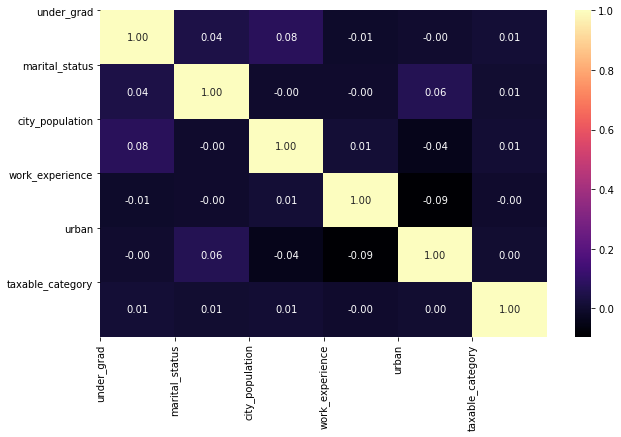

In [18]:

# Correlation analysis for data11
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [22]:
# Dividing data into independent variables and dependent variable
X = data1.drop('taxable_category', axis = 1)
y = data1['taxable_category']

In [23]:
x

NameError: name 'x' is not defined

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: int32

In [24]:

# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [25]:
x_train

,under_grad,marital_status,city_population,work_experience,urban
509,0,1,65531,27,1
149,0,2,49505,25,0
124,1,0,139324,13,0
428,1,1,128266,24,1
465,0,0,116282,21,0
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [26]:
x_test

,under_grad,marital_status,city_population,work_experience,urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
231,1,2,153147,2,0
403,0,0,130912,27,1
278,0,1,114823,11,0
472,0,1,151963,11,1


In [27]:
y_train

509    1
149    0
124    0
428    1
465    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: taxable_category, Length: 402, dtype: int32

In [28]:

y_test

110    1
419    0
565    0
77     0
181    1
      ..
231    0
403    0
278    1
472    0
350    0
Name: taxable_category, Length: 198, dtype: int32

In [29]:
#Building model based on C5.0 Algorithm

In [30]:

model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

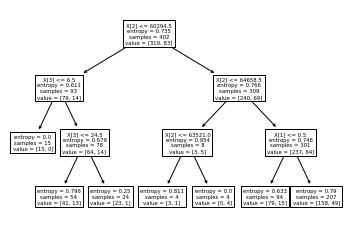

In [31]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [32]:
data1.columns

Index(['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category'],
      dtype='object')

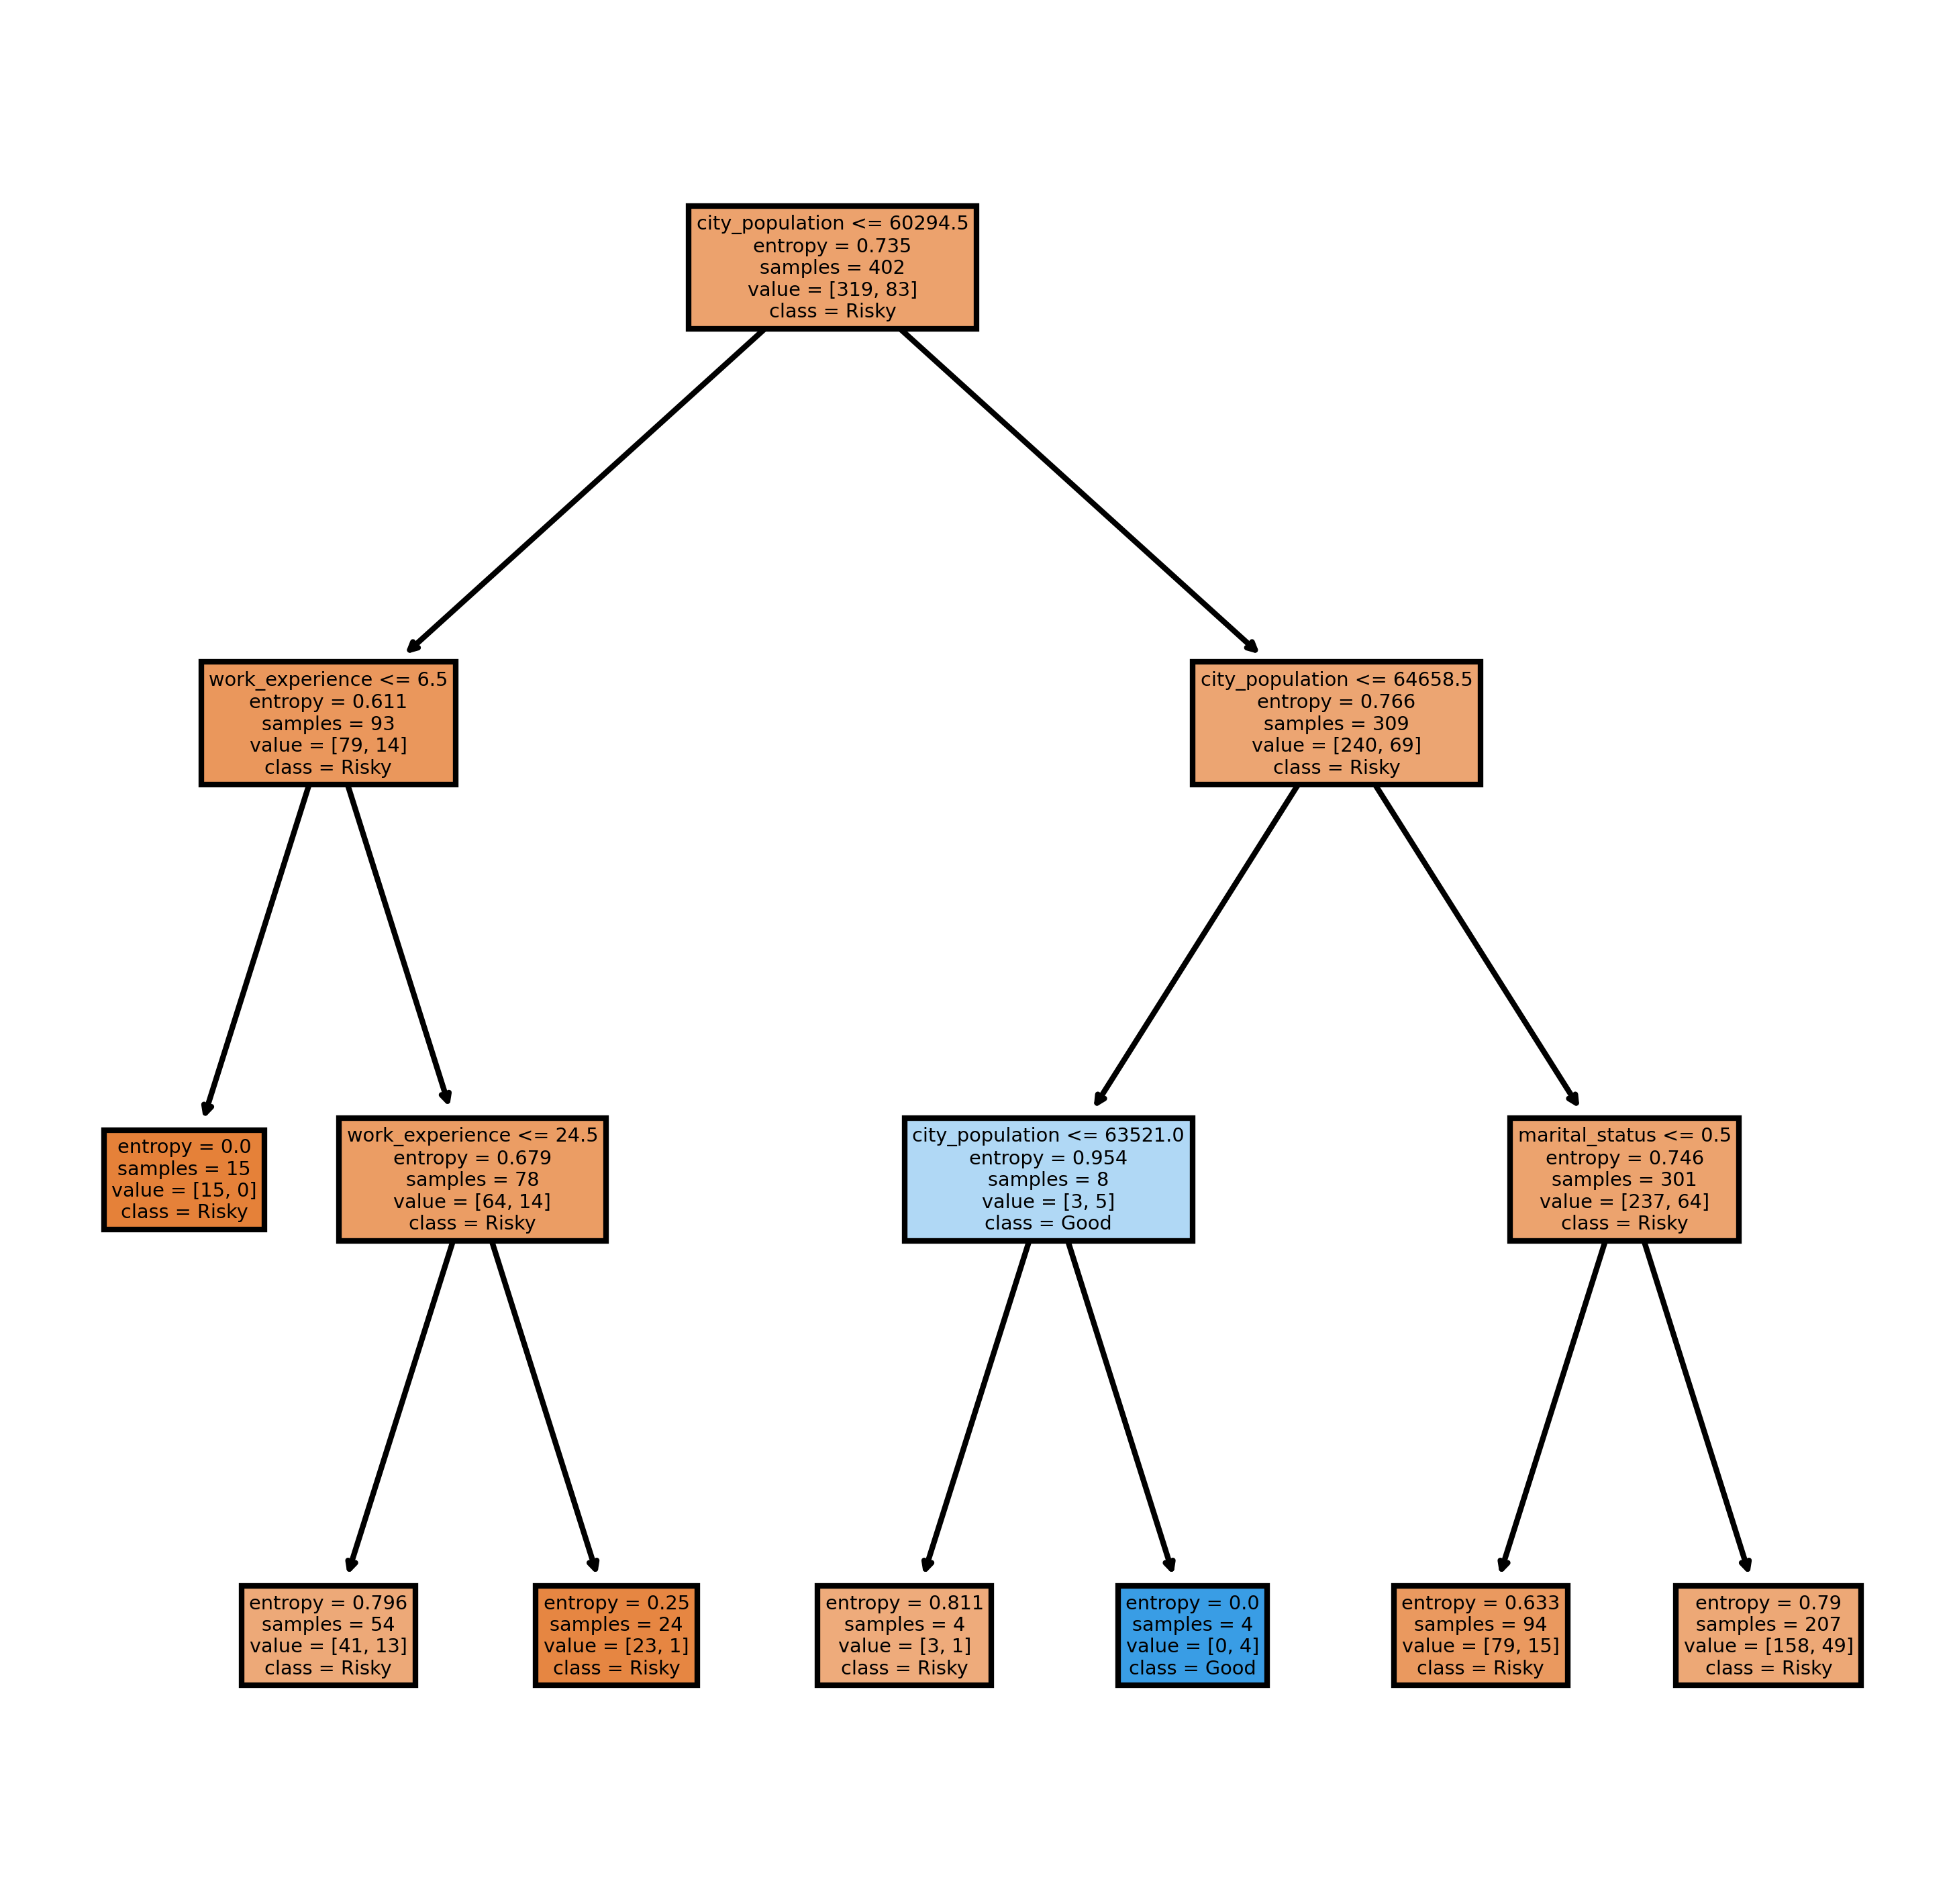

In [33]:

fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:

# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

0    197
1      1
dtype: int64

In [35]:

preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [37]:

# Checking accuracy of model
model_c5.score(x_test, y_test)

0.7878787878787878

In [38]:
#Building model based on CART Algorithm

In [39]:

model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

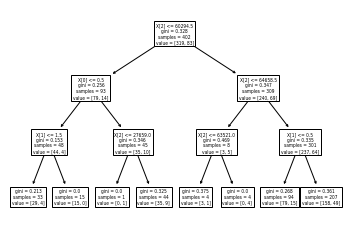

In [40]:

# Plotting Decision tree
tree.plot_tree(model_CART);

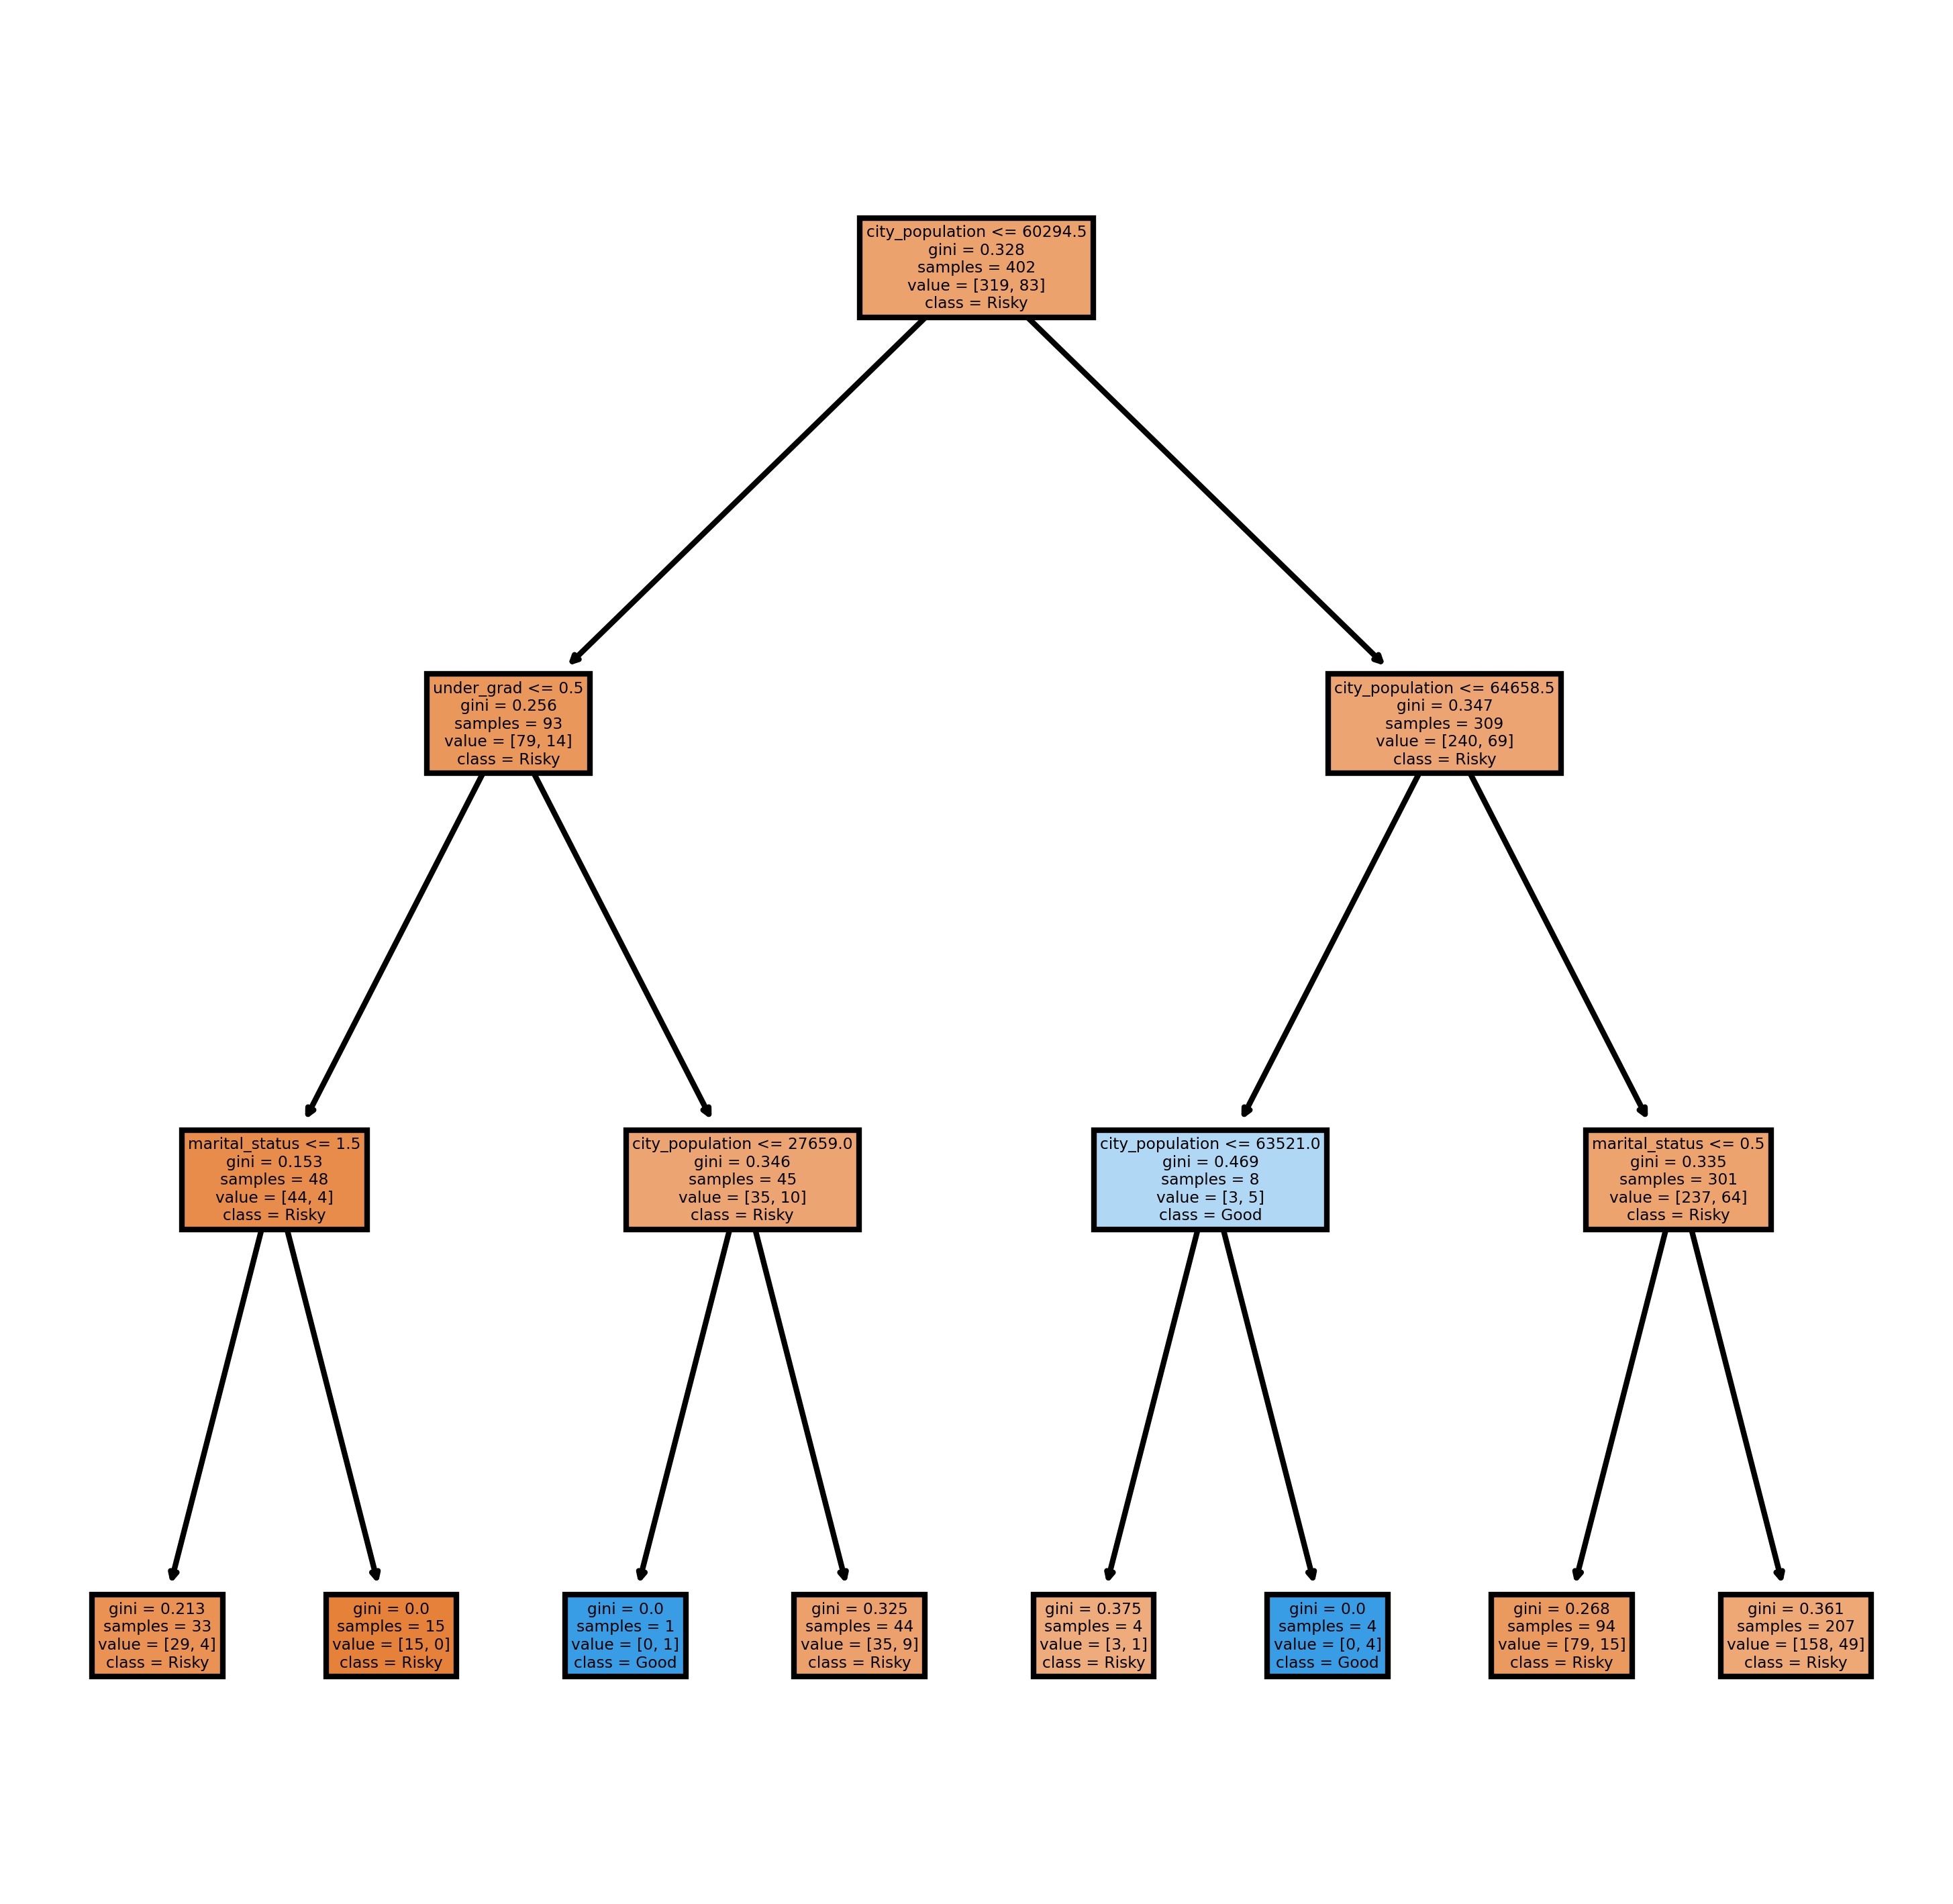

In [41]:

fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [42]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

0    197
1      1
dtype: int64

In [44]:

preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:

# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [46]:

# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0
